In [1]:
import re
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

In [2]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hasancanbiyik/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hasancanbiyik/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/hasancanbiyik/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/hasancanbiyik/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
turkish_stopwords = set(stopwords.words('turkish'))

In [4]:
df_train = pd.read_csv('/Users/hasancanbiyik/sentiment_analysis_turkish/turkish_sentiment_train.csv', encoding='unicode_escape')
df_test = pd.read_csv('/Users/hasancanbiyik/sentiment_analysis_turkish/turkish_sentiment_test.csv', encoding='unicode_escape')

In [5]:
def pre_processing(text):
    text = text.lower()
    text = re.sub("[^abcçdefgğhıijklmnoöprsştuüvyz]", " ", text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in turkish_stopwords]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(tokens)

In [6]:
df_train["clean_text"] = df_train["comment"].apply(pre_processing)
df_test["clean_text"] = df_test["comment"].apply(pre_processing)

In [8]:
X_train = df_train["clean_text"]
X_test = df_test["clean_text"]
y_train = df_train["Label"]
y_test = df_test["Label"]

In [9]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression())
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LogisticRegression())])

In [10]:
y_pred = pipeline.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print('Train Accuracy : %.3f' % pipeline.score(X_train, y_train))
print('Test Accuracy : %.3f' % pipeline.score(X_test, y_test))
print("Precision Score: %.3f" % precision_score(y_test, y_pred, average='macro'))
print("Recall Score: %.3f" % recall_score(y_test, y_pred, average='macro'))
print("F1 Score: %.3f" % f1_score(y_test, y_pred, average='macro'))

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89      1333
           1       0.90      0.88      0.89      1333

    accuracy                           0.89      2666
   macro avg       0.89      0.89      0.89      2666
weighted avg       0.89      0.89      0.89      2666

Train Accuracy : 0.951
Test Accuracy : 0.888
Precision Score: 0.888
Recall Score: 0.888
F1 Score: 0.888


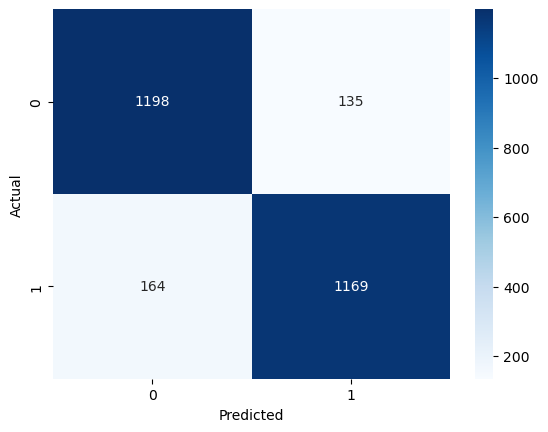

In [11]:
def plot_confusion_matrix(Y_test, Y_preds):
    conf_mat = confusion_matrix(Y_test, Y_preds)
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

plot_confusion_matrix(y_test, y_pred)

In [12]:
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=10)
print("CV average score: %.2f" % cv_scores.mean())

CV average score: 0.89
